<a href="https://colab.research.google.com/github/sugaya-findex/platform-ex/blob/main/R%E3%81%AB%E3%82%88%E3%82%8B%E7%B5%B1%E8%A8%88%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E5%85%A5%E9%96%80_06_%E3%83%95%E3%82%A1%E3%82%A4%E3%83%AB%E3%81%AE%E8%AA%AD%E3%81%BF%E8%BE%BC%E3%81%BF%E3%81%A8%E6%9B%B8%E3%81%8D%E5%87%BA%E3%81%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# １. データファイルの読み込み
データ分析を始めるためには、データが記録された外部ファイルをRに取り込む必要があります。今回はデータをRに読み込む方法を学んでいきましょう。

## １.１. Colabのディレクトリ構造
ファイルの読み込み方法を理解するためにはまず、Colabのディレクトリの構造を理解しておかなければなりません。はじめに、現在のRの作業ディレクトリの場所を確認しておきましょう。

In [ ]:
getwd()

[1] "/content"

`getwd`は現在の作業ディレクトリの場所を確認するための関数で、この出力結果からわかるように、`/content`がデフォルトの作業ディレクトリになっています。



Colabは仮想環境であるため、今現在、このディレクトリと皆さんのローカルPCとは連携が取れていない状態です。そのためデータファイルを読み込むには、

- 読み込む対象のファイルを、Colabのセッションストレージにアップロードする
- マイドライブをマウントして、Colabからマイドライブのファイルへのアクセスを可能にする

のいずれかの方法を取る必要があります。

## １.２. Colabのセッションストレージにファイルをアップロードする方法
ノートブックを開いたときに現れる左側の「ファイル」アイコンを押下後、画面上部の「セッションストレージアップロード」アイコンを選択してファイルをアップロードします。あるいは、ファイルを直接、フォルダ構成下の空白の画面位置にドラック&ドロップしていただいても構いません。ツリー状のフォルダ構成の一覧にアップロードしたファイル名が表示されれば、アップロードが成功しています。すぐにファイル名が表示されない場合には、「右クリック」→「更新」から画面を更新してみてください。

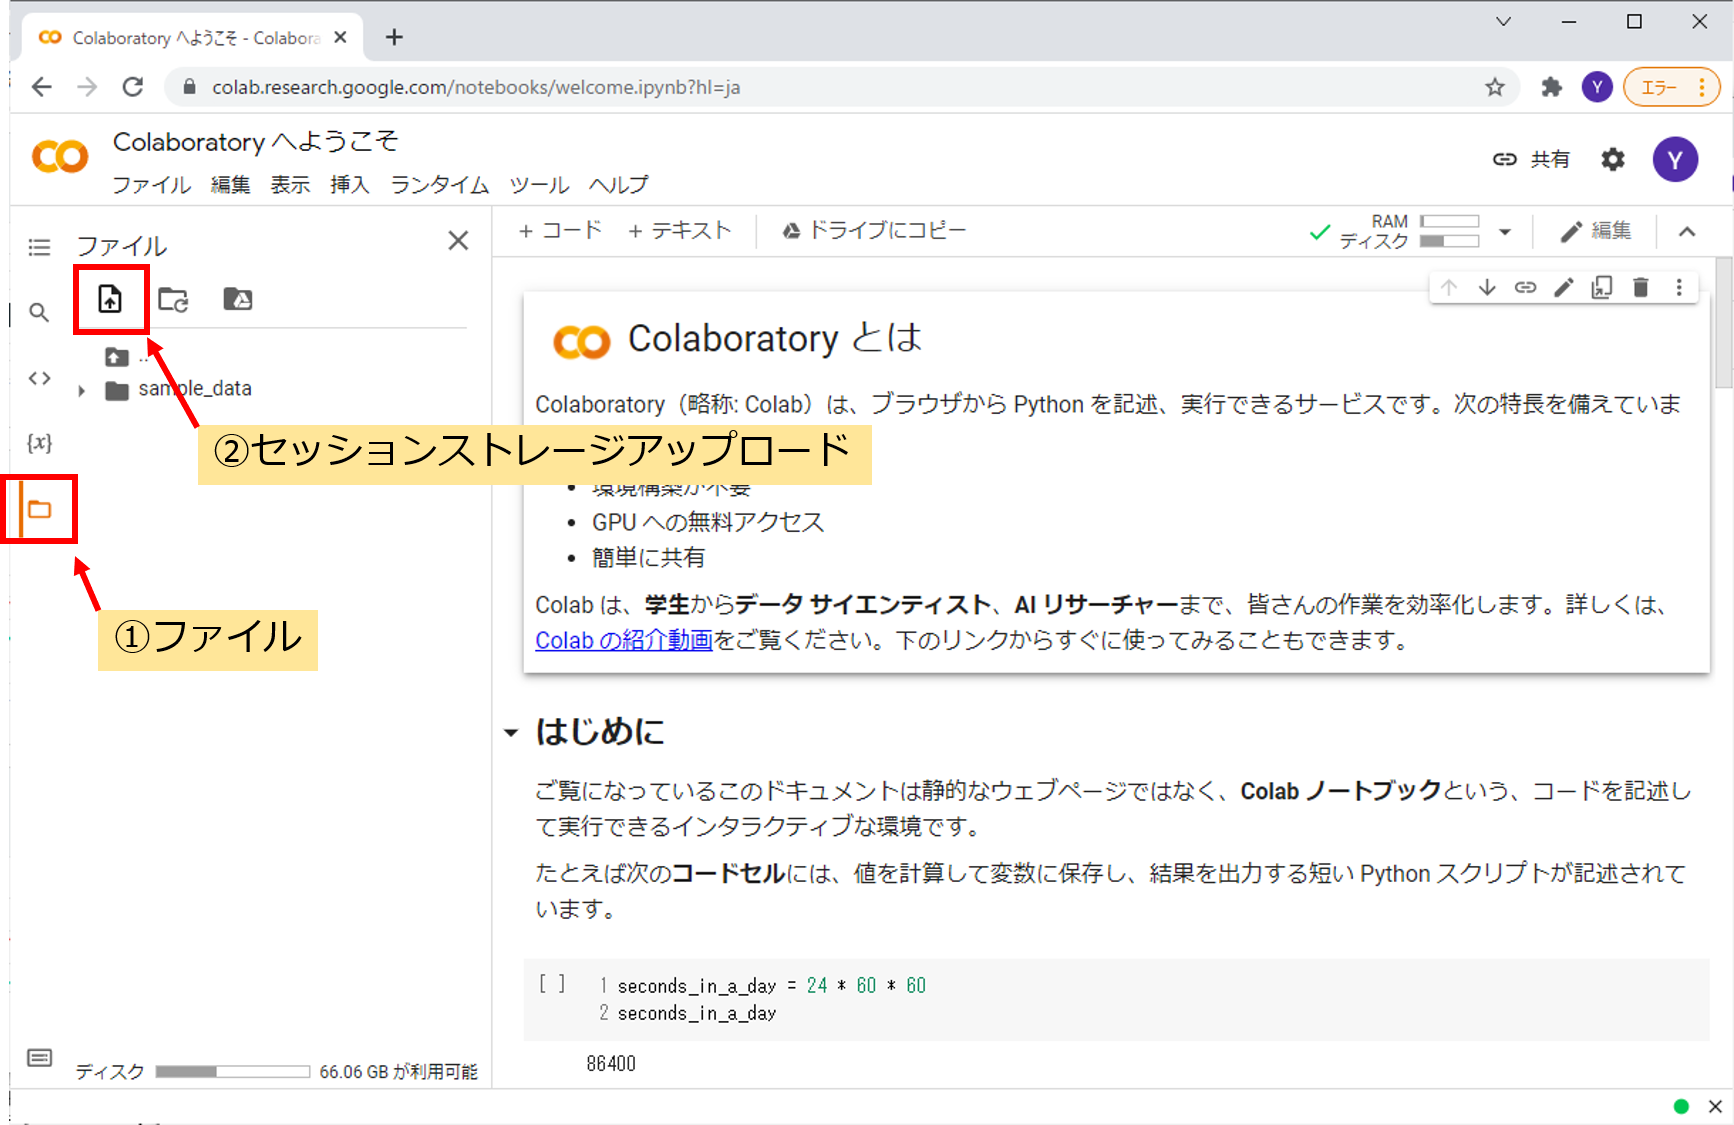

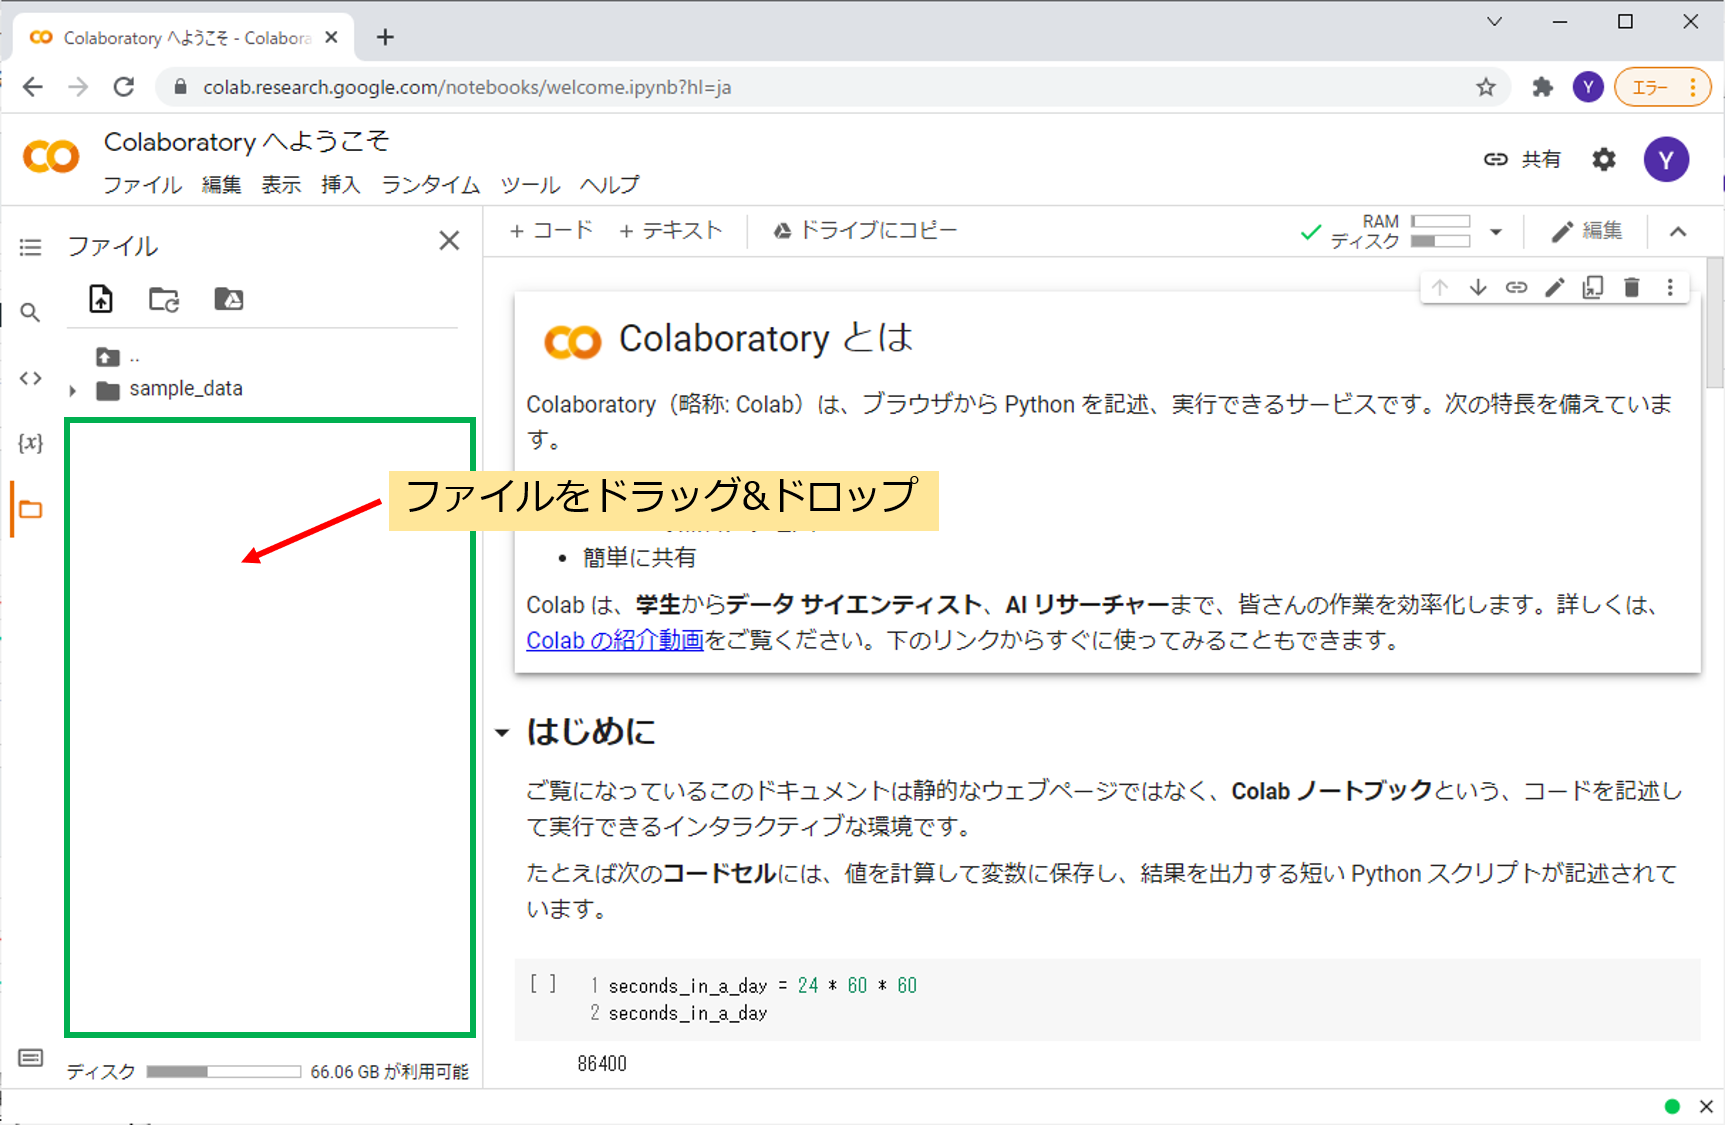

## １.３. マイドライブをマウントする方法
マイドライブをマウントするには、いくつかのコマンド操作が必要になります。まず、以下のコマンドを実行してみてください。連携するアカウントを聞かれるので、ひとつ選択してください。「Google ドライブのすべてのファイルの表示、編集、作成、削除 です。」にチェックを入れ、「Continue」を押してください。すると、認証コードが表示されたウィンドウが立ち上がるので、ウィンドウ内のアイコンをクリックしてコードをコピーし、コードセルの枠内に貼り付けてください。Enterキーを押すと、マイドライブをマウントすることができます。

In [ ]:
# 以下のコマンドを実行すると、マイドライブをマウントすることができます。
# 上記の手順に従って、マウントできるか各自試してみてください。

install.packages("googledrive")
install.packages("R.utils")
library(googledrive)
library("R.utils")
library("httr")
my_check <- function() {return(TRUE)}
reassignInPackage("is_interactive", pkgName = "httr", my_check) 
options(rlang_interactive=TRUE)
drive_auth(use_oob = TRUE, cache = FALSE)

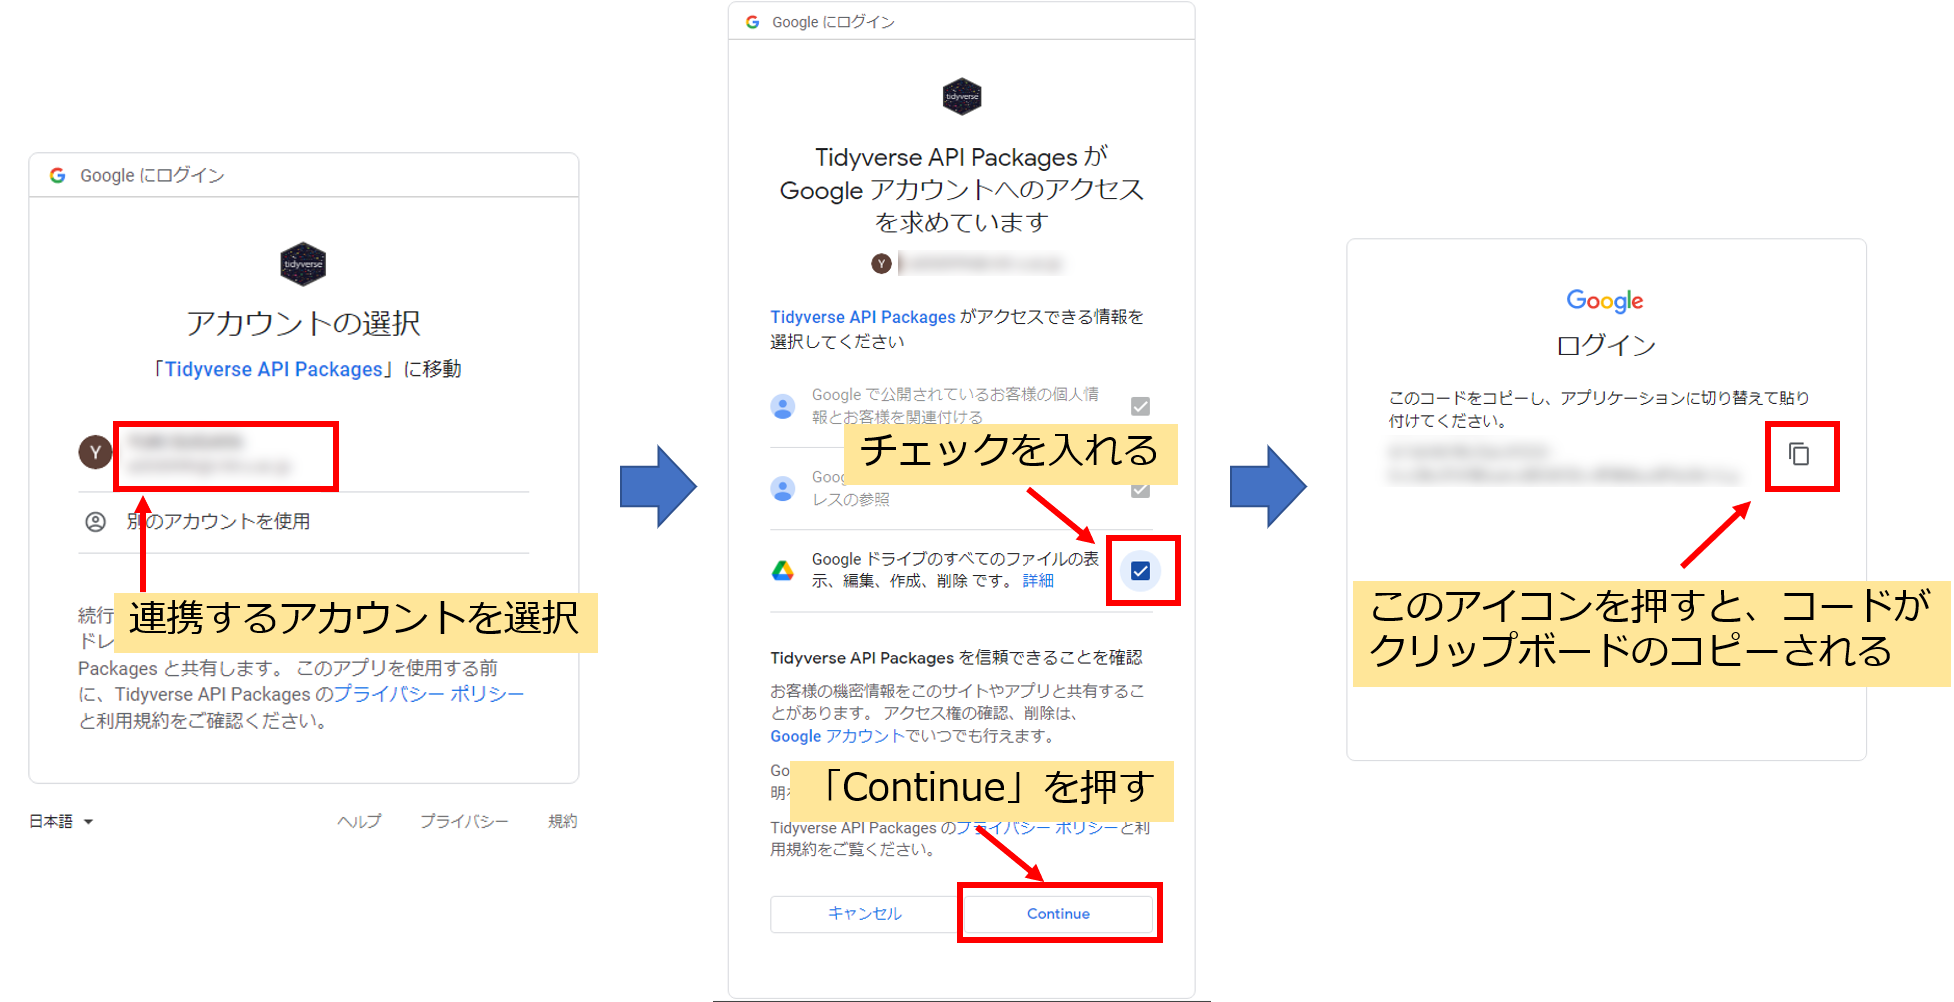

上記コマンドが正しく処理されれば、マイドライブがマウントできています。講義のページから「iris.txt」ファイルをダウンロードし、マイドライブ直下に配置してみてください。以下のコマンドを実行すると、マイドライブに配置した「iris.txt」をColabのセッションストレージにアップロードすることができます。

※Colabのセッションストレージ側から見れば、マイドライブからファイルをダウンロードしてくるかたちになるため、実行コマンドが`drive_download`になっている点に注意してください。

In [ ]:
# 以下のコマンドを実行すると、ローカルファイルを
# セッションストレージにアップロードすることができます。

file <- drive_get("iris.txt")
drive_download(file, overwrite = TRUE)

## １.４. テキストデータの読み込み
１．２．または１．３．の方法によりファイルをアップロードすることができたら、実際にそのデータをRに読み込んでみましょう。

関数`read.table`を利用すると、テキストデータをRに読み込むことができます。この関数は以下のように様々な引数を受け取ることができますが、組織化されたデータであれば、ファイル名`file`、ヘッダー情報の有無`header`、データのセパレーター`sep`を指定すれば、うまく読み込むことができるでしょう。

In [ ]:
str(read.table)

function (file, header = FALSE, sep = "", quote = "\"'", dec = ".", numerals = c("allow.loss", 
    "warn.loss", "no.loss"), row.names, col.names, as.is = !stringsAsFactors, 
    na.strings = "NA", colClasses = NA, nrows = -1, skip = 0, check.names = TRUE, 
    fill = !blank.lines.skip, strip.white = FALSE, blank.lines.skip = TRUE, 
    comment.char = "#", allowEscapes = FALSE, flush = FALSE, stringsAsFactors = FALSE, 
    fileEncoding = "", encoding = "unknown", text, skipNul = FALSE)  


それでは、先ほどアップロードした`iris.txt`に記録されているデータをRに読み込んでみましょう。まず、iris.txtをメモ帳などのエディタで開き、ヘッダー情報の有無とデータのセパレーターをまず確認してみてください。

1行目は各観測項目のラベル、2行目以降にデータ本体が格納されていると思います。また、各観測項目がタブで区切られていることが確認できると思います。このようにiris.txtはヘッダー付きのタブ区切りテキストデータですので、関数`read.table`を使ってデータを読み込むためには、`header`には`T`を、`sep`にはタブ区切りを意味する`\t`を与えればよいことがわかります。

以下のコマンドを実行して、データ読み込んでみましょう。


```R
############################################################
# 以下のコマンドをコードセルに入力し、実行してみてください #
############################################################
iris = read.table("iris.txt", header=T, sep="\t")
head(iris)
```


もし、ヘッダー情報がないデータファイルであれば`header=F`、コンマ区切りのデータであれば`sep=","`と指定することになります。入力ファイルがRの作業ディレクトリと異なるディレクトリにある場合には、
- 関数`setwd`を使って、ファイルが配置されているディレクトリに作業ディレクトリを変更する
- 引数`file`のファイル名を相対パスや絶対パスの形式で指定する

のいずれかの方法を使うと、ファイルを読み込むことができます。

## １.５. エクセルデータの読み込み
Rではエクセルファイルを読み込むこともできますが、別途ライブラリのインストールが必要になります。ここでは`openxlsx`パッケージの関数`read.xlsx`を利用してエクセルファイルを読み込んでみることにしましょう。

※`openxlsx`以外にもエクセルファイルをRに読み込むためのパッケージは存在しますが、ここではこのパッケージを利用してファイルを読み込んでみることにします。

まず、パッケージをインストールして、関数の引数を確認してみましょう。


```R
############################################################
# 以下のコマンドをコードセルに入力し、実行してみてください #
############################################################
install.packages("openxlsx")
library(openxlsx)
str(read.xlsx)
```


`read.xlsx`では、`xlsxFile`オプションで読み込むファイル名、`sheet`オプションで読み込むシートを指定してファイルを読み込みます。`sheet`を指定しなければ、エクセルファイルの1枚目のシートが読み込まれます。

講義のページから「iris.xlsx」ファイルをダウンロード後、セッションストレージにアップロードしてみてください。ファイルをアップロードできたら、以下のコマンドを実行してファイルを読み込んでみてください。


```R
############################################################
# 以下のコマンドをコードセルに入力し、実行してみてください #
############################################################
iris.excel = read.xlsx("iris.xlsx")
head(iris.excel)
```


iris.xlsxには、2枚目以降のシートに品種ごとのデータも保存されています。例えば`setosa`のシートに保存されているデータを読み込みたい場合には、以下のようにコマンドを実行します。


```R
############################################################
# 以下のコマンドをコードセルに入力し、実行してみてください #
############################################################
iris.excel2 = read.xlsx("iris.xlsx",sheet="setosa")
head(iris.excel2)

```


## １.６. 大規模データの読み込み



## １.６.１ `read.table`を使った読み込み
読み込むファイルのサイズが大きい場合、`read.table`を使うと処理時間がかなりかかってしまいます。下手をすると、数十分かかっても読み込めないという事態も起こりえます。

ここではアメリカ統計学会が主催したデータ分析コンペティションに提供された旅客機運行実績データを例に、大規模ファイルの読み込み時間を計測してみましょう。

まずファイルをダウンロードし、解凍しておきます。ここでは、2008年のデータを対象にすることにします。以下のコードを実行して、ファイルをダウンロードしてみてください。

In [ ]:
# このコードセルを実行して、ファイルをダウンロードしてください。

download.file("https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/HG7NV7/EIR0RA","2008.csv.bz2")
install.packages("R.utils")
library(R.utils)
bunzip2("2008.csv.bz2", "2008.csv", remove = FALSE, skip = TRUE)

上記コマンドを実行すると、セッションストレージ上に2008年のデータである`2008.csv`が出来上がります。関数`system.time`を用いると引数内の処理にかかった時間を計測することができますので、この関数を使ってファイルの読み込み時間を計測してみましょう。


```R
############################################################
# 以下のコマンドをコードセルに入力し、実行してみてください #
############################################################
system.time(data2008 <- read.table("2008.csv",sep=",",header=T))
```

iris.txtの読み込みと比べて、かなり処理時間がかかったと思います。

ファイルサイズと先頭のデータを確認しておきます。


```R
############################################################
# 以下のコマンドをコードセルに入力し、実行してみてください #
############################################################
dim(data2008)
head(data2008)
```

## １.６.２ `data.table`パッケージを利用した読み込み
ファイルサイズが大きい場合、`data.table`パッケージの`fread`関数を用いると高速にファイルを読み込むことができます。パッケージをインストールし、データの読み込み時間を計測してみましょう。デフォルトでは`data.table`という特別なクラスのオブジェクトとして読み込まれてしまうので、データフレームとして読み込めるように、`data.table=F`のオプションを指定してファイルを読み込むことにします。


```R
############################################################
# 以下のコマンドをコードセルに入力し、実行してみてください #
############################################################
install.packages("data.table")
library(data.table)
system.time(data2008_fread <- fread("2008.csv",sep=",",header=T,data.table=F))
```

関数`identical`を使って、`read.table`で読み込んだ結果と同じになっているか確かめてみます。


```R
############################################################
# 以下のコマンドをコードセルに入力し、実行してみてください #
############################################################
identical(data2008,data2008_fread)
```

# ２. データのファイル出力
今度はRのデータフレームをテキスト形式でファイル出力してみましょう。データをファイルに出力する場合には、関数`write.table`を利用します。`write.table`で受け取ることができる引数は、以下の通りです。出力したいRのオブジェクトを`x`、出力ファイル名を`file`で指定します。通常、データフレームには変数の名前が付けられていると思いますので、ヘッダー情報の出力有無を表す`col.names`には`T`を与えることになるでしょう。その場合、データの出力形式が崩れないように、行番号の出力有無を表す`row.names`には`F`を与えておくとよいでしょう。文字列データや因子データをダブルクオーテーションで囲う必要がなければ、`quote=F`を指定します。

In [ ]:
str(write.table)

function (x, file = "", append = FALSE, quote = TRUE, sep = " ", eol = "\n", 
    na = "NA", dec = ".", row.names = TRUE, col.names = TRUE, qmethod = c("escape", 
        "double"), fileEncoding = "")  



```R
############################################################
# 以下のコマンドをコードセルに入力し、実行してみてください #
############################################################
write.table(iris, "iris_output.txt", sep="\t", col.names=T, row.names=F, quote=F)
```

出力されたファイルは、Colabのセッションストレージ上に保存されます。ランタイムがアイムアウトしてしまうとファイルが消えてしまいますので、もしファイルをローカル環境に保存したければ、ファイルの上で右クリックしてダウンロードしてください。マイドライブがマウントされている状態であれば、以下のコマンドでファイルをマイドライブにダウンロードすることもできます。

※Colabのセッションストレージ側から見れば、マイドライブにファイルをアップロードするかたちになるため、実行コマンドが`drive_upload`になっている点に注意してください。


```R
############################################################
# 以下のコマンドをコードセルに入力し、実行してみてください #
############################################################
drive_upload("iris_output.txt")
```

出力された`iris_output.txt`をエディタで開き、ファイルがきちんと出力されていることを確認してみてください。